In [1]:
import pandas as pd
import numpy as np
bd=pd.read_csv('Data_Train (2).csv')


In [2]:
#Creating empty columns
import warnings
warnings.filterwarnings('ignore')
bd['Namen']=""
bd['Model']=""
bd['Version']=""

In [3]:
#Filling the empty columns by dividing the column 'Name' into the columns 'Namen', 'Model', and 'Version'
import re
pat=re.compile(' ')
for i in range(len(bd['Name'])):
    res=re.split(pat,bd['Name'].iloc[i])
    bd['Namen'].iloc[i]=res[0]
    bd['Model'].iloc[i]=res[1]
    bd['Version'].iloc[i]=res[2:]

In [4]:
 
#Converting the list of elements of the column 'Version' into an object with an underscore('_') between the words
for _ in range(len(bd.Version)):
    jv='_'
    temp=jv.join(bd.Version[_])
    bd.Version[_]=temp
print(bd.Version[0])

R_LXI_CNG


In [5]:
#Deleting the main 'Name' column and renaming 'Namen' as 'Name'
bd=bd.drop(columns='Name')
bd=bd.rename(columns={"Namen": "Name"})

In [6]:


#code to handle null values of the column 'Seats'
#Copying all the indexes for which the 'Seats' value is null into a list nu
nu=list()
for k in range(len(bd['Seats'])):
    if(bd['Seats'].isnull().iloc[k]==True):
        nu.append(k)

In [7]:

#Filling the rows having null values in 'Seats' with the same value as that of another row having same 'Model' and 'Version' that is not null
bd['Seats']=bd['Seats'].fillna('null')        
for i in nu:
    for j in range(len(bd)):
        if((bd['Model'][j]==bd['Model'][i])&(bd['Version'][j]==bd['Version'][i])&(bd['Seats'][j]!='null')):
            bd['Seats'][i]=bd['Seats'][j] 

In [8]:
            
#Dropping the rows that still have null values for 'Seats'           
bd=bd[bd['Seats']!='null']

In [9]:


#code to handle null values of the column 'Power'
#Copying all the indexes for which the 'Power' value is null into a list nu1
nu1=list()
for l in range(len(bd['Power'])):
    if((bd['Power'].iloc[l]=='null bhp') | (bd['Power'].isnull().iloc[l])):
        nu1.append(l)



In [10]:
#Filling the rows having null values in 'Power' with the same value as that of another row having same 'Model' and 'Version' that is not null
for a in nu1:
    for b in range(len(bd)):
        if((bd['Model'].iloc[b]==bd['Model'].iloc[a])&(bd['Version'].iloc[b]==bd['Version'].iloc[a])&(bd['Power'].iloc[b]!='null bhp') ):
            bd['Power'].iloc[a]=bd['Power'].iloc[b]  
            

In [11]:
            
#Dropping the rows that still have null values for 'Seats' 
bd=bd[bd['Power']!='null bhp']



In [12]:

#code to handle null values of the column 'Engine'
#Copying all the indexes for which the 'Engine' value is null into a list nu2
nu2=list()
for m in range(len(bd['Engine'])):
    if((bd['Engine'].isnull().iloc[m])):
        nu2.append(m)  

In [13]:

#Filling the rows having null values in 'Engine' with the same value as that of another row having same 'Model' and 'Version' that is not null
bd['Engine']=bd['Engine'].fillna('null')  
for c in nu2:
    for d in range(len(bd)):
        if((bd['Model'].iloc[d]==bd['Model'].iloc[c])&(bd['Version'].iloc[d]==bd['Version'].iloc[c])&(bd['Engine'].iloc[d]!='null') ):
            bd['Engine'].iloc[c]=bd['Engine'].iloc[d]

In [14]:

#Dropping all the rows that have null values in any of their columns
bd=bd.dropna(how='any')

In [15]:

#Removing units from the columns
new=bd['Mileage'].str.split(' ',expand=True)
bd['Mileage']=new[0]
new=bd['Engine'].str.split(' ',expand=True)
bd['Engine']=new[0]
new=bd['Power'].str.split(' ',expand=True)
bd['Power']=new[0]
bd[['Mileage','Engine','Power']]=bd[['Mileage','Engine','Power']].apply(pd.to_numeric)

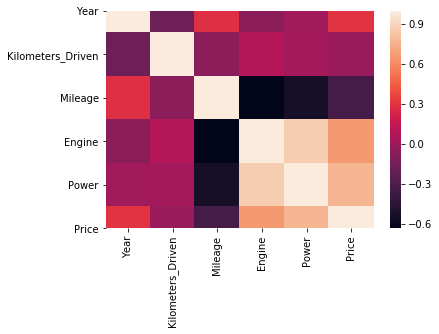

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(bd.corr())

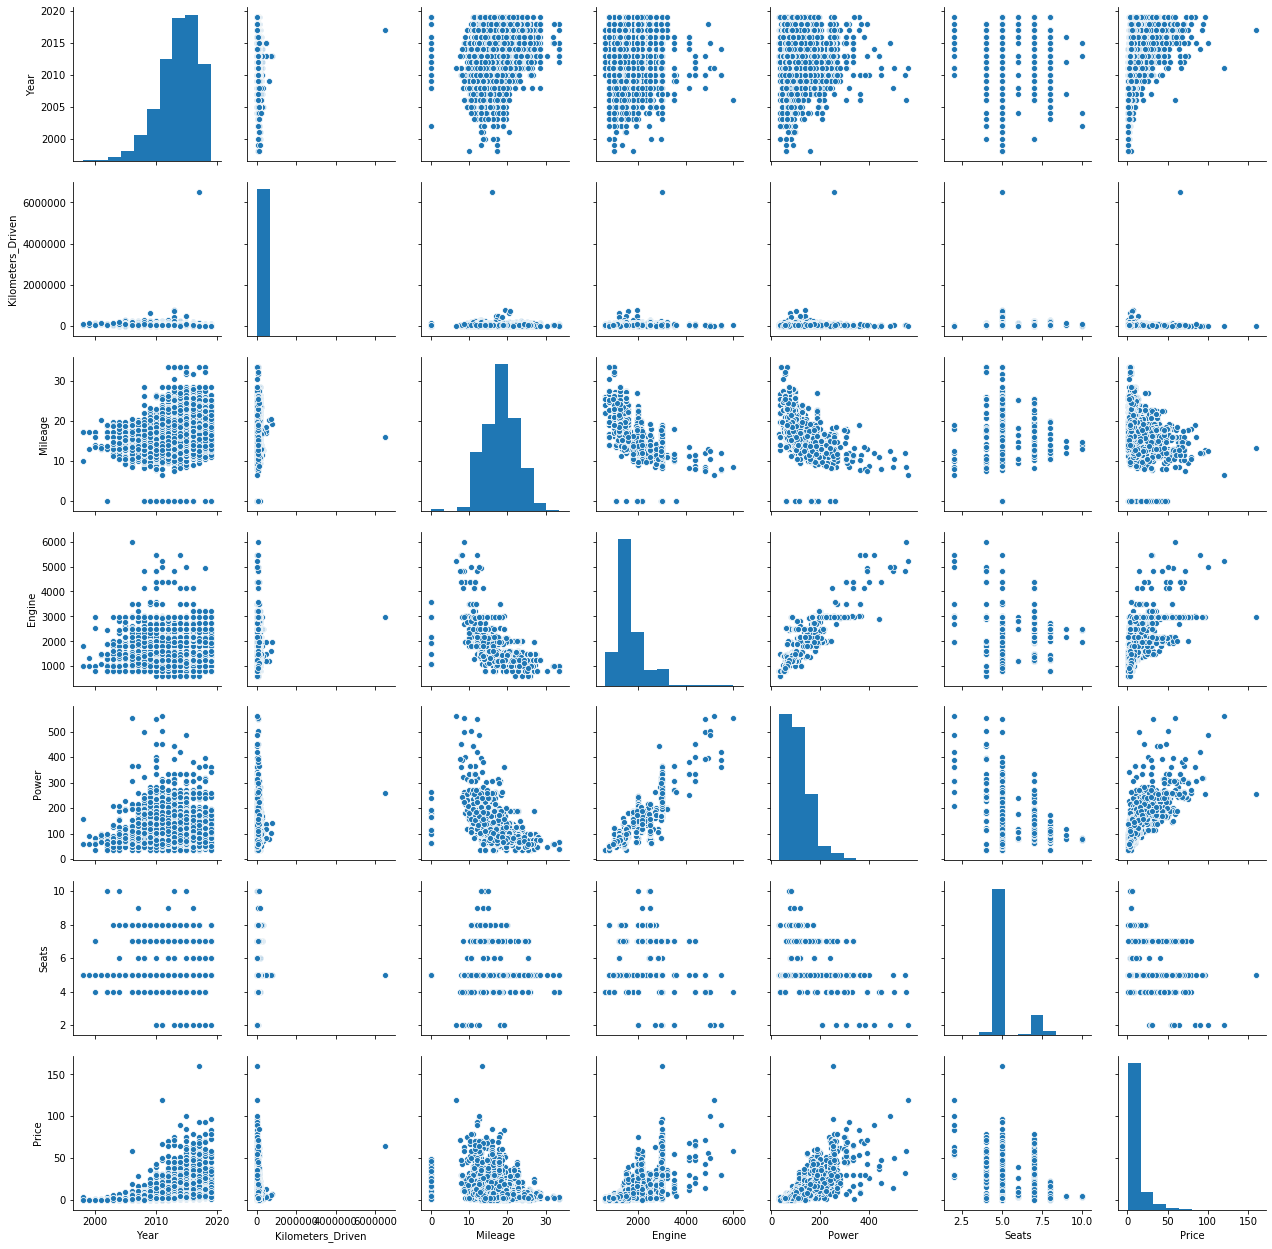

In [17]:
sns.pairplot(bd)

we can see that all columns have some kind of relation with the Price. Some columns might have low relationship but we keep them for more accuracy.


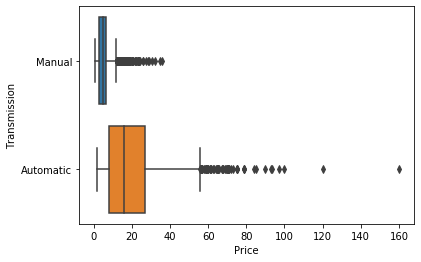

In [18]:
sns.boxplot(x='Price',y='Transmission',data=bd)

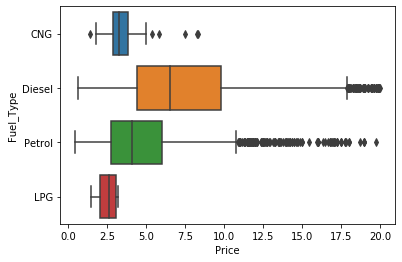

In [19]:
sns.boxplot(x='Price',y='Fuel_Type',data=bd.loc[(bd['Price']<20)])

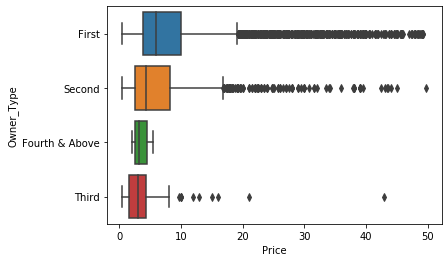

In [20]:
sns.boxplot(x='Price',y='Owner_Type',data=bd.loc[(bd['Price']<50)])

We see that there is some order for all the three columns, and thus we must consider Label Encoding.

In [21]:

test=pd.read_excel('Data_Test (2).xlsx')



In [22]:

#Doing the same data preparation to the test data as done with train data
import warnings
warnings.filterwarnings('ignore')
test['Namen']=""
test['Model']=""
test['Version']=""

In [23]:
import re
pat=re.compile(' ')
for i in range(len(test['Name'])):
    res=re.split(pat,test['Name'].iloc[i])
    test['Namen'].iloc[i]=res[0]
    test['Model'].iloc[i]=res[1]
    test['Version'].iloc[i]=res[2:]

In [24]:
for _ in range(len(test.Version)):
    jv='_'
    temp=jv.join(test.Version[_])
    test.Version[_]=temp
print(test.Version[0])   



K10_LXI_CNG


In [25]:
test=test.drop(columns='Name')
test=test.rename(columns={"Namen": "Name"})



In [26]:
for k in range(len(test)):
    if(test['Power'][k]=='null bhp'):
         test['Power'].iloc[k]=float('nan') 
         

In [27]:

#Removing units from the columns
new=test['Mileage'].str.split(' ',expand=True)
test['Mileage']=new[0]
new=test['Engine'].str.split(' ',expand=True)
test['Engine']=new[0]
new=test['Power'].str.split(' ',expand=True)
test['Power']=new[0]
test[['Mileage','Engine','Power']]=test[['Mileage','Engine','Power']].apply(pd.to_numeric)

In [28]:

bd = bd[['Year','Fuel_Type','Transmission','Owner_Type','Seats','Name','Model','Version','Location','Kilometers_Driven','Mileage','Engine','Power','Price']]

test = test[['Year','Fuel_Type','Transmission','Owner_Type','Seats','Name','Model','Version','Location','Kilometers_Driven','Mileage','Engine','Power']]

In [29]:

#OneHotEncoding the categorical columns 'Name', 'Model', 'Version', and 'Location'
bd=pd.get_dummies(bd, columns=['Name','Model','Version','Location'],prefix_sep='_')
test=pd.get_dummies(test, columns=['Name','Model','Version','Location'],prefix_sep='_')

In [30]:

#Label encoding the train data columns 'Year', 'Fuel_type', 'Owner_Type', 'Seats', 'Transmission'
X=bd.iloc[:,:-1].values
y=bd.iloc[:,13].values



In [31]:


#Converting the values of 'Fuel_Type' according to the order of trend seen in analysis
for i in range(len(X)):
    X[i,1]=X[i,1].replace('Diesel','d')
    X[i,1]=X[i,1].replace('CNG','b')
    X[i,1]=X[i,1].replace('LPG','a')
    X[i,1]=X[i,1].replace('Petrol','c')

In [32]:
    
#Converting the values of 'Transmission' according to the order of trend seen in analysis    
for i in range(len(X)):
    X[i,2]=X[i,2].replace('Automatic','b')
    X[i,2]=X[i,2].replace('Manual','a')

In [33]:
#Converting the values of 'Owner_Type' according to the order of trend seen in analysis 
for i in range(len(X)):
    X[i,3]=X[i,3].replace('First','d')
    X[i,3]=X[i,3].replace('Second','c')
    X[i,3]=X[i,3].replace('Third','b')
    X[i,3]=X[i,3].replace('Fourth & Above','a')

In [34]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

X[:,1]=labelencoder_X.fit_transform(X[:,1])

X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X[:,4]=labelencoder_X.fit_transform(X[:,4])

In [35]:
#Label Encoding the test data columns same as the train data
Xt=test.iloc[:,:-1].values
yt=test.iloc[:,13].values

In [36]:

for i in range(1234):
    Xt[i,1]=Xt[i,1].replace('Diesel','d')
    Xt[i,1]=Xt[i,1].replace('CNG','b')
    Xt[i,1]=Xt[i,1].replace('LPG','a')
    Xt[i,1]=Xt[i,1].replace('Petrol','c')
    
for i in range(1234):
    Xt[i,2]=Xt[i,2].replace('Automatic','b')
    Xt[i,2]=Xt[i,2].replace('Manual','a')
    
for i in range(1234):
    Xt[i,3]=Xt[i,3].replace('First','d')
    Xt[i,3]=Xt[i,3].replace('Second','c')
    Xt[i,3]=Xt[i,3].replace('Third','b')
    Xt[i,3]=Xt[i,3].replace('Fourth & Above','a')
    

In [37]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_Xt=LabelEncoder()
Xt[:,0]=labelencoder_Xt.fit_transform(Xt[:,0])
Xt[:,1]=labelencoder_Xt.fit_transform(Xt[:,1])
Xt[:,2]=labelencoder_Xt.fit_transform(Xt[:,2])
Xt[:,3]=labelencoder_Xt.fit_transform(Xt[:,3])
Xt[:,4]=labelencoder_Xt.fit_transform(Xt[:,4])

In [38]:
for i in range(len(bd)):
    bd.iloc[i,0]=X[i,0]
    bd.iloc[i,1]=X[i,1]
    bd.iloc[i,2]=X[i,2]
    bd.iloc[i,3]=X[i,3]
    bd.iloc[i,4]=X[i,4]
bd  

,Year,Fuel_Type,Transmission,Owner_Type,Seats,Kilometers_Driven,Mileage,Engine,Power,Price,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,12,1,0,3,2,72000,26.60,998,58.16,1.75,...,0,0,0,0,0,0,0,0,1,0
1,17,3,0,3,2,41000,19.67,1582,126.20,12.50,...,0,0,0,0,0,0,0,0,0,1
2,13,2,0,3,2,46000,18.20,1199,88.70,4.50,...,0,1,0,0,0,0,0,0,0,0
3,14,3,0,3,4,87000,20.77,1248,88.76,6.00,...,0,1,0,0,0,0,0,0,0,0
4,15,3,1,2,2,40670,15.20,1968,140.80,17.74,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,16,3,0,3,2,27365,28.40,1248,74.00,4.75,...,0,0,0,1,0,0,0,0,0,0
6015,17,3,0,3,2,100000,24.40,1120,71.00,4.00,...,0,0,0,0,0,1,0,0,0,0
6016,14,3,0,2,5,55000,14.00,2498,112.00,2.90,...,0,0,0,0,0,1,0,0,0,0
6017,15,2,0,3,2,46000,18.90,998,67.10,2.65,...,0,0,0,0,0,0,0,1,0,0


In [39]:
for i in range(len(test)):
    test.iloc[i,0]=Xt[i,0]
    test.iloc[i,1]=Xt[i,1]
    test.iloc[i,2]=Xt[i,2]
    test.iloc[i,3]=Xt[i,3]
    test.iloc[i,4]=Xt[i,4]
test 

,Year,Fuel_Type,Transmission,Owner_Type,Seats,Kilometers_Driven,Mileage,Engine,Power,Name_Audi,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,14,1,0,3,4.0,40929,32.26,998.0,58.20,0,...,0,0,0,1,0,0,0,0,0,0
1,13,2,0,2,5.0,54493,24.70,796.0,47.30,0,...,0,0,1,0,0,0,0,0,0,0
2,17,3,0,3,7.0,34000,13.68,2393.0,147.80,0,...,0,0,0,0,0,0,0,0,1,0
3,12,3,0,3,5.0,139000,23.59,1364.0,NaN,0,...,0,0,0,0,1,0,0,0,0,0
4,14,2,0,3,5.0,29000,18.50,1197.0,82.85,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,11,3,0,3,5.0,89411,20.54,1598.0,103.60,0,...,0,0,0,0,1,0,0,0,0,0
1230,15,2,1,3,5.0,59000,17.21,1197.0,103.60,0,...,0,0,0,0,0,0,0,0,1,0
1231,12,3,0,3,5.0,28000,23.08,1461.0,63.10,0,...,0,0,0,0,0,0,0,1,0,0
1232,13,2,1,1,5.0,52262,17.20,1197.0,103.60,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
test=test.dropna(how='any')

In [41]:
#Making necessary changes to columns in test data as columns change after OneHotEncoding
for i in test.columns.tolist():
    if i not in bd.columns.tolist():
        test.drop(i,axis=1,inplace=True)
        
for i in bd.columns.tolist():
    if i not in test.columns.tolist() and i!='Price':
        test[i]=0
        

In [42]:

#Checking the accuracy of our model by splitting the train data as we have no price column in the test data
#Note: This is just for checking accuracy
X=bd.iloc[:,:-1].values
y=bd.iloc[:,9].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#Fitting the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
#Predictions and accuracy of the model
y_pred=regressor.predict(X_test)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train, np.ravel(y_train))
pred=rf.predict(X_test)
errors = abs(pred-np.ravel(y_test))
mape = 100 * (errors / np.ravel(y_test))
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.91 %.


In [43]:

#Fitting the whole train data to predict price from the given test data
X_train=bd.loc[:,bd.columns!='Price']
y_train=bd.loc[:,bd.columns=='Price']
X_test=test.loc[:,:]
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, np.ravel(y_train))



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [44]:

#Prediction
pred=rf.predict(X_test)
print(pred)

[ 2.54199     2.04892    14.16940333 ...  2.45648     3.66798
 16.4543    ]
